<a href="https://colab.research.google.com/github/Maurya273/Project7_Statistical-Analysis-and-Hypothesis-Testing-VIP-AINEAI/blob/main/Project_7_Statistical_Analysis_and_Hypothesis_Testing_VIP_AINEAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 7: Statistical Analysis and Hypothesis Testing

## Packages and setup

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro # to do the shapiro test to check the normality of the data
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cookie_cats.csv to cookie_cats.csv


### Reading data and initial processing

In [ ]:
#Read data using pandas
user_df=pd.read_csv("cookie_cats.csv")

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. number of rows and number of columns using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("\nFirst 5 rows of the raw data:")
user_df.head(5)

Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)


First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [ ]:
#Check for any missing values in the data using isnull() function
user_df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

### Q1.2 Identify outliers

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

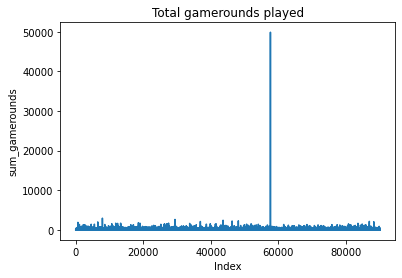

In [ ]:
#Check for outlier values in sum_gamerounds column using lineplot
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

In [ ]:
#Based on the plot, filter out the outlier from sum_gamerounds played;

max_no = max(user_df.sum_gamerounds) # to get the max value of the column sum_gamerounds

user_df[user_df.sum_gamerounds.isin([max_no])] # isin() helps to select rows with a particular value in a particular column

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


In [ ]:
user_df[user_df.sum_gamerounds == max_no] # helps to select rows with a particular value in a particular column

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


In [ ]:
user_df.drop([57702], axis=0, inplace=True) # we remove the outlier row from the dataframe

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

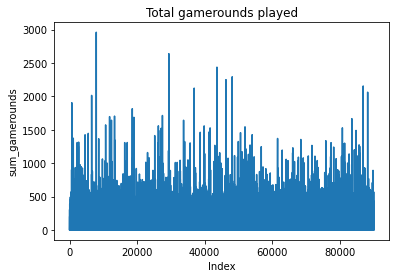

In [ ]:
#Plot the graph for sum_gamerounds player after removing the outlier

plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)

## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [ ]:
user_df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [ ]:
#Insert calculation for 7-day retention rate
a = len(user_df[(user_df.retention_7 == True)])
retention_rate_7= a/user_df.shape[0]
print("Overall 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%")


Overall 7 days retention rate of the game for both versions is:  0.1860648194347426 %


### Q2.2 How many players never played the game after installing? 

In [ ]:
# Find number of customers with sum_gamerounds is equal to zero
b = len(user_df[(user_df.sum_gamerounds == 0)]) # we can assume those who havent even played one gameround as "never played"
print('The number of players who never played the game after installing are :',b)


The number of players who never played the game after installing are : 3994


### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

In [ ]:
user_df.sum_gamerounds.nunique()

942

In [ ]:
user_df.sum_gamerounds.quantile(0.95)

221.0

,userid,version,retention_1,retention_7
sum_gamerounds,,,,
0,3994,3994,3994,3994
1,5538,5538,5538,5538
2,4606,4606,4606,4606
3,3958,3958,3958,3958
4,3629,3629,3629,3629


,userid,version,retention_1,retention_7
sum_gamerounds,,,,
2294,1,1,1,1
2438,1,1,1,1
2640,1,1,1,1
2961,1,1,1,1
49854,1,1,1,1


(942, 4)
(221, 4)
The number of users for the first 221 gamerounds are: 85668


Text(0, 0.5, 'Number of players who played those many game rounds')

Text(0.5, 0, 'No of game rounds played')

Text(0.5, 1.0, 'Count of players who played gamerounds')

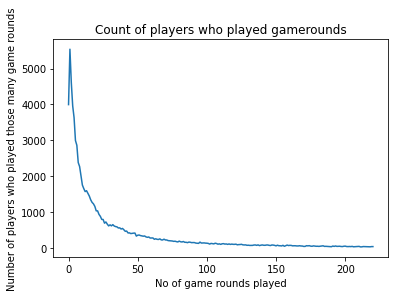

In [ ]:
#We can observe that 95% of the players who played the game, have played less than 221 gamerounds
# So we can find an estimate for all the players with the help of 221 gamerounds
#Use plot() function on the summarized stats to visualize the chart

df = user_df.groupby('sum_gamerounds').count() # count gives the number of non null observations
display(df.head())
display(df.tail())
print(df.shape)
df1 = df[df.index < 221]
print(df1.shape)
print("The number of users for the first 221 gamerounds are:",df1.userid.sum()) # we know the total number of rows in initial dataset is 90189
plt.plot(df1.userid)
plt.ylabel('Number of players who played those many game rounds')
plt.xlabel('No of game rounds played')
plt.title('Count of players who played gamerounds')

So we can observe that the number of users are decreasing as the level progresses, this highlights the difficulty of the game.

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [ ]:
pd.crosstab(user_df.version, user_df.retention_7).count

<bound method DataFrame.count of retention_7  False  True 
version                  
gate_30      36198   8502
gate_40      37210   8279>

In [ ]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


In [ ]:
# It gives the percentage of players of a particular game version who were retained after 7th day 

<mark>__Analsysis Results:__
    
Type your interpretation here from the crosstab generated above   

The retention of players after 7 days is better if the gate is at 30, than at 40. As the % of retention for the gate_30 version is 0.19, which is greater than 0.18.

### Q3.2 Gamerounds summary for different game versions

In [ ]:
#use groupby function to calculate average game rounds played summarized by different versions

user_df.groupby('version').sum_gamerounds.mean()

version
gate_30    51.342111
gate_40    51.298776
Name: sum_gamerounds, dtype: float64

<mark>__Analsysis Results:__
    
Do total number of gamerounds played in total by each player differ based on  different versions of the game? 

Yes, as we can see that the average gamerounds played a player is slightly higher for the version of gate_30, than that of gate_40.

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

In [ ]:
user_df1 = user_df.copy()

### Initial data processing

In [ ]:
#Define A/B groups for hypothesis testing
user_df1["version"] = np.where(user_df1.version == "gate_30", "A", "B") # wherever there is a gate_30, it is replaced with A
group_A=pd.DataFrame(user_df1[user_df1.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(user_df1[user_df1.version=="B"]['sum_gamerounds'])
user_df1.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,False,False
1,337,A,38,True,False
2,377,B,165,True,False
3,483,B,1,False,False
4,488,B,179,True,True


In [ ]:
print(group_A.shape,group_B.shape)

(44699, 1) (45489, 1)


Hence, the two groups have almost a similar number of rows.

In [ ]:
group_A.head()

,sum_gamerounds
0,3
1,38
6,0
11,0
13,39


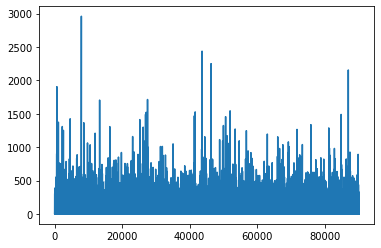

In [ ]:
plt.plot(group_A)

Shapiro Wilk Test

It is a test of normality. Its null hypothesis states that a sample came from a normally distributed population. , I.E that a sample is normally distributed.
If the p value is less than the choosen alpha value, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed. On the other hand, if the p value is greater than the chosen alpha level, then the null hypothesis (that the data came from a normally distributed population) cannot be rejected.

### Q4.1 Shapiro test of Normality

In [ ]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

# Executing the code: "shapiro(data)"

#test for group_A
stat, p1 = shapiro(group_A)  # greater the 'stat' value closer is the distribution to normality
alpha = 0.05 # 95% confidence # alpha is the probability of rejecting H0 when it is true
print(stat)
print("Calculated p value is ",p1)
if p1 > alpha:
	print('SampleA looks Gaussian  (fail to reject H0)')
else:
	print('SampleA does not look Gaussian (reject H0)')
#test for group_B
stat, p2 = shapiro(group_B)
print(stat)
print("Calculated p value is ",p2)
if p2 > alpha:
	print('SampleB looks Gaussian  (fail to reject H0)')
else:
	print('SampleB does not look Gaussian (reject H0)')

0.48864424228668213
Calculated significant value is  0.0
SampleA does not look Gaussian (reject H0)
0.48256540298461914
Calculated significant value is  0.0
SampleB does not look Gaussian (reject H0)


<mark>__Analsysis Results:__
    
__Type your answer here:__ Analyze and interpret the results of shapiro test of normality i.e. are the two groups normally distributed?

Both of them are not normally distributed.

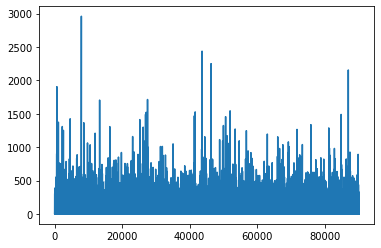

In [ ]:
plt.plot(group_A)

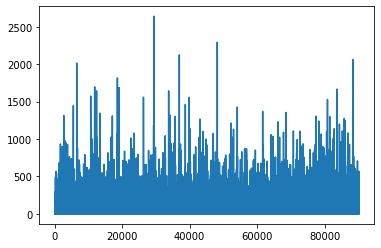

In [ ]:
plt.plot(group_B)

### Q4.2 Test of homegienity of variance

In [ ]:
list_A = list(group_A.iloc[:,0]) # or group_A["sum_gamerounds"].values.tolist()
list_B = list(group_B.iloc[:,0])

In [ ]:
list_A[0:5]

[3, 38, 0, 0, 39]

In [ ]:
group_A.head()

,sum_gamerounds
0,3
1,38
6,0
11,0
13,39


The p value quantifies the probability of observing as or more exterme values assuming the null hypothesis, that the samples are drawn from populations with the same population means is true.
If p value >  choosen threshold , then our observation is not so unlikely to have occured by chance.

Levene's Test

It is an inferential statistic used to assess the equality of variances for a variable calculated for two or more groups.

Commonly the null hypothesis is taken as: the variances of different samples drawn from a population are equal. If the resulting p value of Levene's Test is less than some significance level(typically 0.05) then the null hypothesis of equal variances is REJECTED and there it is concluded that there is a difference between the variances in the population and vice-versa.

In [ ]:
#---------------------- Leven's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results

import scipy.stats as stats

#Levene's test centered at the median
stats,pvalue = stats.levene(list_A, list_B, center='median') # by default the center is at median
# The 'center' parameter can take 3 different values
# median is used for skewed or non-normal distribution
# mean is used for symmetric, moderate-tailed distribution
# trimmed for heavy tailed distribution
alpha = 0.05
if pvalue > alpha:
	print('Two groups have equal variance (fail to reject H0)')
else:
	print('Two groups DO not have equal variance (reject H0)')
print('The statistic value is',stats, 'the p value is', pvalue )

Two groups have equal variance (fail to reject H0)
The statistic value is 0.5292002638313259 the p value is 0.46694516772623273


In [ ]:
import scipy.stats as stats
#Levene's test centered at the mean
stats,pvalue = stats.levene(list_A, list_B, center='mean')
alpha = 0.05
if pvalue > alpha:
	print('Two groups have equal variance (fail to reject H0)')
else:
	print('Two groups DO not have equal variance (reject H0)')
print('The statistic value is',stats, 'the p value is', pvalue )


Two groups have equal variance (fail to reject H0)
The statistic value is 1.0975945431948215 the p value is 0.29479741580831087


<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of Levene's test

In both methods, the p-value is greater than .05. So, we fail to reject the null hypothesis, in both the cases.
So the two groups have equal variances.

In [ ]:
print(np.var(group_A), np.var(group_B))

sum_gamerounds    10415.520268
dtype: float64 sum_gamerounds    10669.501865
dtype: float64


### Q4.3 Test of significance: Two sample test

stats.ttest_ind

It calculates the T-test for the means of two independent samples of scores.
This is a two-sided test for the null hypothesis that 2 independent samples have identical average(expected)values. 
If we take equal_var = True(default) it performs a standard independent 2 sample test that assumes equal population variances.
If False, perform Welch's T-test, which does not assume equal population variance.

In [ ]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

#Apply relevant two sample test to accept or reject the NULL hypothesis

from scipy.stats import ttest_ind
stats,pvalue = ttest_ind(np.array(group_A), np.array(group_B),equal_var = False) # make sure both the groups have equal dimension
alpha = 0.05
if pvalue > alpha:
	print('Two groups are equal (fail to reject H0))')
else:
	print('Two groups are different(reject H0)')
print('The statistic value is',stats, 'the p value is', pvalue )

Two groups are equal (fail to reject H0))
The statistic value is [0.88543743] the p value is [0.37592438]


<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation from the results of two sample hyothesis testing

The two samples are having an equal distribution.

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [ ]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function
user_df.groupby('version').mean()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


In [ ]:
len(user_df[(user_df.retention_1==True)&(user_df.version=='gate_30')])/len(user_df[(user_df.version=='gate_30')])

0.4481879194630872

So the game version with gate_30 is performing much better in terms of average retetion rate on day1 and on day7. 

The gate_30 version game players also play a higher number of gamerounds, on average.

<mark>__Analsysis Results:__
    
__Type your answer here:__ Write your final recommendation to the company regarding which level works best as the first gate  - Level 30 or Level 40

Level 30 is better for the company.

## Q6. [Bonus Question]  Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

In [ ]:
#Hint: Plot density function